In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from utils import make_confusion_matrix, plot_metrics


# Data Preparation

In [10]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/Notebook 5 Data/train",
    image_size=(64, 64),
    batch_size=32,
    seed=42
)

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/Notebook 5 Data/val",
    image_size=(64, 64),
    batch_size=32,
    seed=42
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    "./data/Notebook 5 Data/test",
    image_size=(64, 64),
    batch_size=32,
    seed=42
)

Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3565 files belonging to 7 classes.


In [5]:
class_names = train_dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6']

In [6]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.prefetch(tf.data.AUTOTUNE)

In [13]:
input = tf.keras.layers.Input(shape=(64, 64, 3))
x = tf.keras.layers.Conv2D(128, kernel_size=3)(input)
x = tf.keras.layers.Conv2D(256, kernel_size=3)(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64, kernel_size=3)(x)
x = tf.keras.layers.Conv2D(32, kernel_size=3)(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model_1 = tf.keras.Model(input, output)

model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        147520    
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        18464     
                                                           

In [14]:
model_1.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["acc"]
)

history_1 = model_1.fit(
    train_dataset,
    epochs=5,
    validation_data=(valid_dataset)
)

Epoch 1/5
898/898 [==============================] - 73s 81ms/step - loss: 11.6909 - acc: 0.2665 - val_loss: 2.4942 - val_acc: 0.2836
Epoch 2/5
898/898 [==============================] - 72s 80ms/step - loss: 2.1131 - acc: 0.3344 - val_loss: 1.8319 - val_acc: 0.3725
Epoch 3/5
898/898 [==============================] - 71s 79ms/step - loss: 1.7553 - acc: 0.3833 - val_loss: 1.7045 - val_acc: 0.3853
Epoch 4/5
898/898 [==============================] - 71s 79ms/step - loss: 1.6453 - acc: 0.4090 - val_loss: 1.8188 - val_acc: 0.3502
Epoch 5/5
898/898 [==============================] - 72s 80ms/step - loss: 1.5946 - acc: 0.4214 - val_loss: 1.9420 - val_acc: 0.3435


In [15]:
# model_1.save("./model/Notebook 5/model_1.h5")
model_1.save("model_1.h5")

In [17]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model model_1.h5 model/

Writing weight file model/model.json...


2022-06-01 14:15:36.677558: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-01 14:15:37.261757: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2004 MB memory:  -> device: 0, name: GeForce GTX 1650 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-06-01 14:15:38.399876: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-06-01 14:15:39.038381: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-01 14:15:39.039230: I tensorflow/core/grappler/cluste

In [18]:
efficient_net = tf.keras.applications.EfficientNetB0(
    include_top=False)  # B0-B7
# include_top = False: Don't give me the output layer

efficient_net

In [19]:
# Let's check if the model is freeze
efficient_net.trainable

True

In [20]:
# We have to freeze the model weights during training for feature extraction
efficient_net.trainable = False

In [22]:
# Functional API
input = tf.keras.layers.Input(shape=(64, 64, 3))
x = efficient_net(input)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model_2 = tf.keras.Model(input, output)

model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 7)                 8967      
                                                                 
Total params: 4,058,538
Trainable params: 8,967
Non-trainable params: 4,049,571
_________________________________________________________________


In [23]:
model_2.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['acc']
)

history_2 = model_2.fit(
    train_dataset,
    epochs=5,
    validation_data=(valid_dataset)
)

Epoch 1/5
898/898 [==============================] - 38s 33ms/step - loss: 1.5700 - acc: 0.3897 - val_loss: 1.4921 - val_acc: 0.4221
Epoch 2/5
898/898 [==============================] - 28s 31ms/step - loss: 1.4694 - acc: 0.4337 - val_loss: 1.4646 - val_acc: 0.4335
Epoch 3/5
898/898 [==============================] - 26s 29ms/step - loss: 1.4422 - acc: 0.4476 - val_loss: 1.4582 - val_acc: 0.4433
Epoch 4/5
898/898 [==============================] - 27s 30ms/step - loss: 1.4200 - acc: 0.4547 - val_loss: 1.4617 - val_acc: 0.4452
Epoch 5/5
898/898 [==============================] - 27s 30ms/step - loss: 1.4020 - acc: 0.4625 - val_loss: 1.4576 - val_acc: 0.4455


## Fine Tuning

In [24]:
len(efficient_net.layers)

237

In [25]:
# Unfreeze last 37 layers in the efficient_net
efficient_net.trainable = True

for layer in efficient_net.layers[:200]:
  layer.trainable = False

In [ ]:
model_2.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [26]:
model_2.fit(
    train_dataset,
    epochs=10,
    initial_epoch=history_2.epoch[-1],  # 4
    validation_data=(valid_dataset)
)

Epoch 5/10
898/898 [==============================] - 32s 36ms/step - loss: 1.3932 - acc: 0.4683 - val_loss: 1.4578 - val_acc: 0.4466
Epoch 6/10
898/898 [==============================] - 29s 32ms/step - loss: 1.3849 - acc: 0.4702 - val_loss: 1.4461 - val_acc: 0.4503
Epoch 7/10
898/898 [==============================] - 33s 37ms/step - loss: 1.3787 - acc: 0.4744 - val_loss: 1.4469 - val_acc: 0.4514
Epoch 8/10
898/898 [==============================] - 34s 38ms/step - loss: 1.3711 - acc: 0.4761 - val_loss: 1.4505 - val_acc: 0.4480
Epoch 9/10
898/898 [==============================] - 33s 37ms/step - loss: 1.3675 - acc: 0.4805 - val_loss: 1.4387 - val_acc: 0.4578
Epoch 10/10
898/898 [==============================] - 33s 36ms/step - loss: 1.3649 - acc: 0.4781 - val_loss: 1.4265 - val_acc: 0.4648


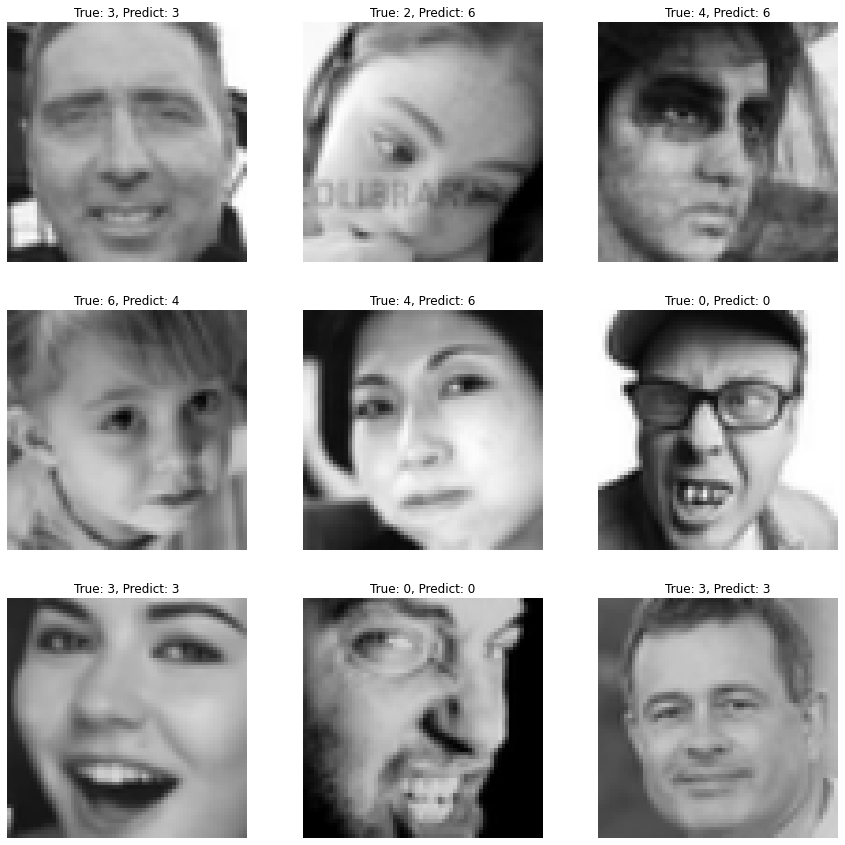

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in valid_dataset.take(1):
  for i in range(9):
    pred_probs = model_2.predict(tf.expand_dims(images[i], axis=0))
    pred = tf.argmax(pred_probs[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    title = f"True: {class_names[labels[i]]}, Predict: {class_names[pred]}"
    plt.title(title)
    plt.axis("off")

In [28]:
model_2.save("model_2.h5")

In [30]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model model_2.h5 model/

Writing weight file model/model.json...


2022-06-02 00:11:36.007322: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-02 00:11:36.501859: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2151 MB memory:  -> device: 0, name: GeForce GTX 1650 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-06-02 00:11:46.267658: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-06-02 00:12:20.957352: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-02 00:12:20.968552: I tensorflow/core/grappler/cluste